# 创建窗体

## 窗体创建函数

```C++
    // 使用指定的标记创建一个指定名字的窗体
    void 	cv::namedWindow (const String &winname, int flags=WINDOW_AUTOSIZE)
       // 无返回值
```

- 窗体创建的标记有：
    - WINDOW_NORMAL / Python: cv.WINDOW_NORMAL
        - 标准窗体：可以放大缩小；
    - WINDOW_AUTOSIZE / Python: cv.WINDOW_AUTOSIZE
        - 窗体不能自动放大缩小，窗体大小受图像大小约束；
    - WINDOW_OPENGL / Python: cv.WINDOW_OPENGL
        - 窗体支持OpenGL；
    - WINDOW_FULLSCREEN / Python: cv.WINDOW_FULLSCREEN
        - 全屏窗体；
    - WINDOW_FREERATIO / Python: cv.WINDOW_FREERATIO
        - 窗体大小随意变换，不受图像比例限制；
    - WINDOW_KEEPRATIO / Python: cv.WINDOW_KEEPRATIO
        - 窗体比例采用图像比例；
    - WINDOW_GUI_EXPANDED / Python: cv.WINDOW_GUI_EXPANDED
        - 窗体可以使用状态条与工具条；
    - WINDOW_GUI_NORMAL / Python: cv.WINDOW_GUI_NORMAL
        - 旧的窗体样式。

## 窗体释放函数

```C++
    // 释放所有窗体
    void 	cv::destroyAllWindows ()
    // 释放指定名字的窗体
    void 	cv::destroyWindow (const String &winname)
```

## 窗体阻塞函数

```C++
    int cv::waitKey	(	int 	delay = 0	)	
    Python:
    retval	=	cv.waitKey(	[, delay]	)

```

```C++
    int cv::waitKeyEx	(	int 	delay = 0	)	
    Python:
    retval	=	cv.waitKeyEx(	[, delay]	)

```

- waitKeyEx返回的键值，依赖相关的系统（Full Key Code包含更多的键值信息，用来开发者做更加细致的处理，比如是否按照组合键alt + D等）。
- delay=0表示无限等待，否则就是等待的延时实践，单位是：milliseconds毫秒；

# 窗体操作

## 窗体大小

```C++
void 	cv::resizeWindow (const String &winname, int width, int height)
void 	cv::resizeWindow (const String &winname, const cv::Size &size)
```

```C++
    // 方式1
    cv::resizeWindow("窗体", 400,300);
    // 方式2
    cv::Size size(400, 300);
    cv::resizeWindow("窗体", size);
```

## 窗体位置

```C++
    void 	cv::moveWindow (const String &winname, int x, int y)
```

## 窗体标题

```C++
    void 	cv::setWindowTitle (const String &winname, const String &title)
```

- 注意：
    - 由于OpenCV没有使用UTF-8编码，所以UTF-8的编码会产生标题乱码；
    - 解决办法：
        - 使用C++11提供的编码转换类转换；这种Mac OS系统无法正常工作；
        - 把源代码保存为GBK或者GB2312，然后编译链接；

## 窗体的属性

```C++
    void cv::setWindowProperty	(	const String & 	winname,
    int 	prop_id,
    double 	prop_value 
    )		
        
    Python:
    None	=	cv.setWindowProperty(	winname, prop_id, prop_value	)

```

```C++
    double 	cv::getWindowProperty (const String &winname, int prop_id)
```

- prop_id参数说明
    - WND_PROP_FULLSCREEN / Python: cv.WND_PROP_FULLSCREEN
        - 全屏还是标准方式
        - WINDOW_NORMAL/WINDOW_FULLSCREEN
    - WND_PROP_AUTOSIZE  / Python: cv.WND_PROP_AUTOSIZE
        - 是否根据图像确定大小
        - WINDOW_AUTOSIZE
    - WND_PROP_ASPECT_RATIO / Python: cv.WND_PROP_ASPECT_RATIO
        - 高宽比例
        - WINDOW_FREERATIO / WINDOW_KEEPRATIO
    - WND_PROP_OPENGL / Python: cv.WND_PROP_OPENGL
        - 是否支持OpenGL
        - WINDOW_OPENGL
    - WND_PROP_VISIBLE / Python: cv.WND_PROP_VISIBLE
        - 隐藏还是可见
        - WINDOW_GUI_EXPANDED / WINDOW_GUI_NORMAL

- 注意：
    - 上面属性WND_PROP_FULLSCREEN与WND_PROP_AUTOSIZE有用！

## 窗体的跟踪条

```C++

    int cv::createTrackbar	(	
        const String & 	trackbarname,
        const String & 	winname,
        int * 	value, 
        int 	count,
        TrackbarCallback 	onChange = 0,
        void * 	userdata = 0 
    )	
```

- 参数说明：
    1. trackbarname：滑动条名
    2. winname：窗体名
    3. value：滑动条的值
    4. count：滑动条的最大值
    5. TrackbarCallback：回调函数
    6. userdata：传递给回调函数的用户数据

```C++
void 	cv::setTrackbarMax (const String &trackbarname, const String &winname, int maxval)
 
void 	cv::setTrackbarMin (const String &trackbarname, const String &winname, int minval)

void 	cv::setTrackbarPos (const String &trackbarname, const String &winname, int pos)

```

```C++
    int cv::getTrackbarPos	(const String & 	trackbarname, const String & 	winname 
)	
```

- 回调函数：
    - `typedef void(* cv::TrackbarCallback) (int pos, void *userdata)`

## 显示图像

```C++

    void cv::imshow	(	const String & 	winname,
        InputArray 	mat 
    )	
```

```C++
	retval	=	cv.startWindowThread(		)

```

- startWindowThread开启窗体线程。
    - 没有什么明显的作用。
    - 应该开启一个独立于OpenCV的线程。

## 图像区域选择

1. 多个区域选择
    - 参数返回选择的多个区域
```C++
void cv::selectROIs	(	const String & 	windowName,
InputArray 	img,
std::vector< Rect > & 	boundingBoxes,
bool 	showCrosshair = true,
bool 	fromCenter = false 
)	
```

2. 单区域选择
    - 返回值返回选择单位区域

```C++
Rect cv::selectROI	(	const String & 	windowName,
    InputArray 	img,
    bool 	showCrosshair = true,
    bool 	fromCenter = false 
)	
```

- 效果
    - 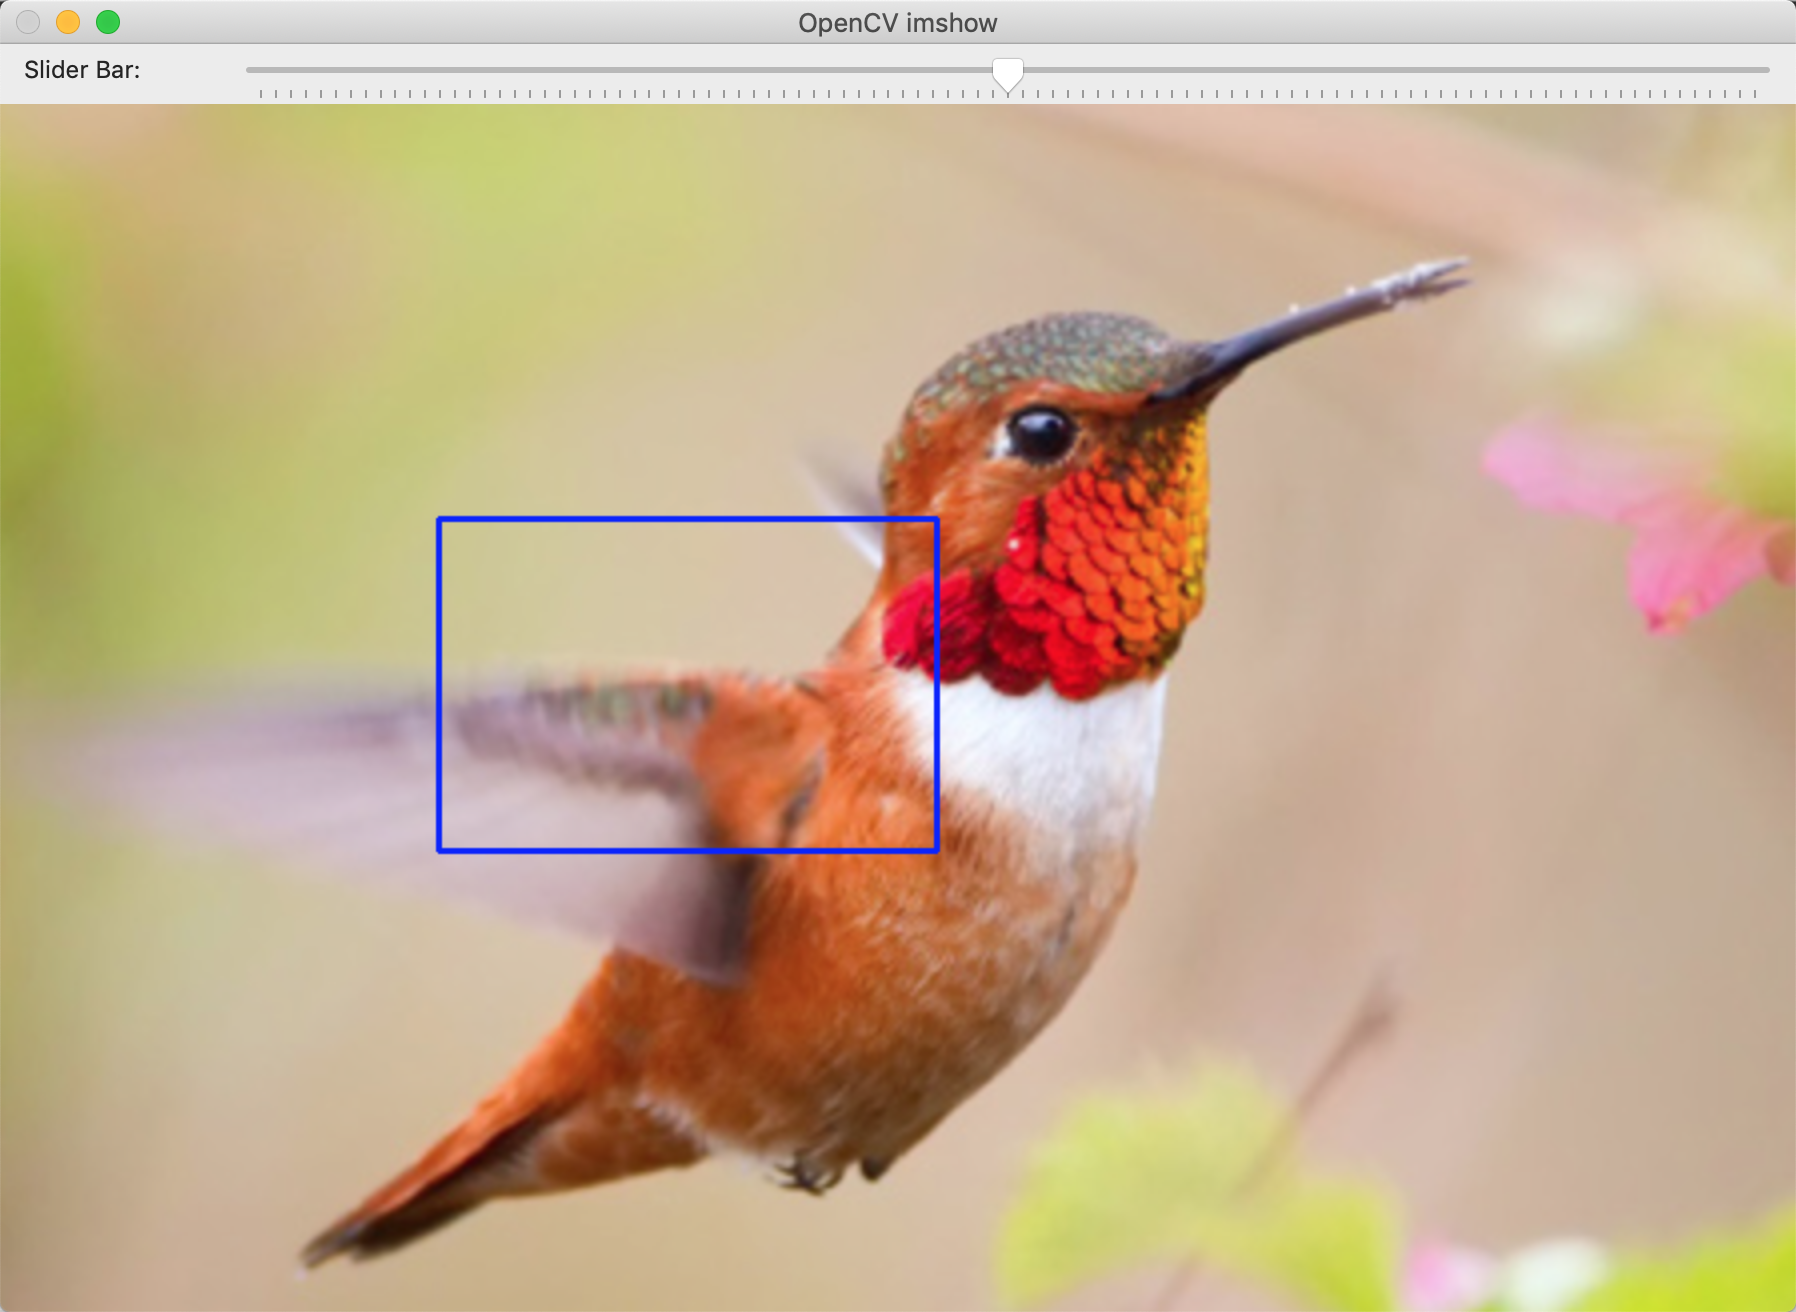

# 窗体的交互事件

## 鼠标交互

- 不支持键盘交互的事件，而是直接返回按键，需要使用循环处理。

```C++
    void cv::setMouseCallback	(	const String & 	winname,
        MouseCallback 	onMouse,
        void * 	userdata = 0 
    )	
```

- 回调函数

```C++
typedef void(* cv::MouseCallback) (int event, int x, int y, int flags, void *userdata)

```

- 参数说明：
    - event返回动作
        1. EVENT_MOUSEMOVE 
        
        2. EVENT_LBUTTONDOWN
        3. EVENT_RBUTTONDOWN
        4. EVENT_MBUTTONDOWN
        
        5. EVENT_LBUTTONUP
        6. EVENT_RBUTTONUP
        7. EVENT_MBUTTONUP
        
        8. EVENT_LBUTTONDBLCLK
        9. EVENT_RBUTTONDBLCLK
        10. EVENT_MBUTTONDBLCLK
        11. EVENT_MOUSEWHEEL
        12. EVENT_MOUSEHWHEEL
    - flags参数返回同时按照的按钮与辅助键
        1. EVENT_FLAG_LBUTTON
        2. EVENT_FLAG_RBUTTON
        3. EVENT_FLAG_MBUTTON
        4. EVENT_FLAG_CTRLKEY
        5. EVENT_FLAG_SHIFTKEY
        6. EVENT_FLAG_ALTKEY

----